# Full Bank Stabilization Estimate

I located the steepest bank slope at cross section 4:

![Cross Section 4](files/cross_section_4.png)

Estimate the slope:

In [1]:
top=(13.0,41.6)
bottom=(20.0,36.2)
slope = (top[1]-bottom[1])/(top[0]-bottom[0])
print("Bank slope:",slope)

Bank slope: -0.7714285714285712


The channel bottom is relatively flat. I'll assume it is completely flat and use a target slope of 1:2 to find the outer edge of the re-enforced bank toe. This calculation yields:

In [2]:
target_slope = 1/2
new_bottom_x = (top[1]-bottom[1])/target_slope + top[0]
print("New bank toe: ",new_bottom_x)

New bank toe:  23.799999999999997


Plot the proposed new bank on an estimate of the current channel profile:

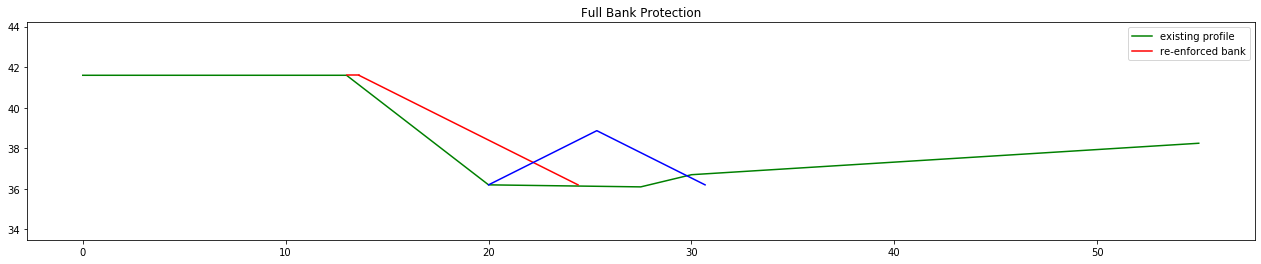

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
thickness = 0.6096# 2ft
fig = plt.figure(figsize=(22,4))
plt.plot([0.0,top[0],bottom[0],27.5,30,55],[top[1],top[1],bottom[1],36.1,36.7,38.25],'g',[thickness+top[0],thickness+new_bottom_x],[top[1],bottom[1]],'r')
plt.plot([top[0],thickness+top[0]],[top[1],top[1]],'r')
#plt.plot([0.0,top[0],bottom[0],27.5,30,55],[top[1],top[1],bottom[1],36.1,36.7,38.25],'g',[top[0],new_bottom_x],[top[1],bottom[1]],'r')
plt.plot([bottom[0],bottom[0]+10.67/2,bottom[0]+10.67],[bottom[1],bottom[1]+2.67,bottom[1]],'b')
#plt.plot([bottom[0]-10.67/2.,bottom[0],bottom[0]+10.67/2.],[bottom[1],bottom[1]+2.67,bottom[1]],'b-.')
plt.legend(['existing profile','re-enforced bank'])
plt.axis('equal')
plt.title('Full Bank Protection');
plt.savefig("moundriprap.png")

Calculate the fill volume per foot along the bank:

In [4]:
import math
ft_per_m=3.2808399
face_length=math.sqrt((top[0]-bottom[0])**2 + (top[1]-bottom[1])**2)
face_diag = math.sqrt((top[0]-(bottom[0]+thickness))**2+(top[1]-bottom[1])**2)
S = (face_diag+face_length+thickness)/2.0
par_area = 2.0*math.sqrt(S*(S-thickness)*(S-face_length)*(S-face_diag))#area of parallelogram for blanket thickness
volume_per_ft = (abs(0.5*(top[1]-bottom[1])*(top[0]-new_bottom_x))+par_area)* (ft_per_m**2)
print("Rate of fill: ", volume_per_ft, "cubic feet per foot")

Rate of fill:  349.30869967929544 cubic feet per foot


# Length of Bank Protection

The bank profile is similar to this worst case scenario profile, both upstream and downstream roughly 150ft.

![Existing bank](files/existing_bank.png)

Carrying the bank protection upstream another 250 feet (to prevent the structure being flanked by a possible chute cutoff of the upstream bar) results in the following planform of the bank protection, with a length of 600ft:

![New Bank](files/top_bank.png)

# Total volume of riprap

In [6]:
volume = 600*volume_per_ft/(3**3)
print("Fill volume: ",volume, "cubic yards")
print("Cost at $50/cubic yard: ${0:.2f}".format(volume*50.0))

Fill volume:  7762.415548428788 cubic yards
Cost at $50/cubic yard: $388120.78
